In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
import pandas as pd

In [3]:
data =pd.read_table('../data/LENS_AB_WORLD_only.tsv') 
# semimajor and semiminor axis in degrees (1 degree = 3600 arcseconds)

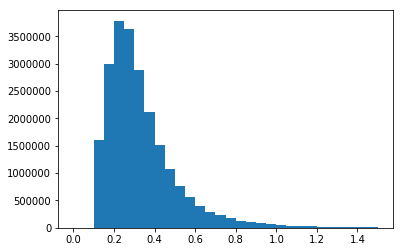

<bound method Series.median of 0           0.397408
1           0.227756
2           0.647089
3           0.234640
4           0.547157
5           0.474674
6           0.345854
7           0.342520
8           0.902678
9           1.259654
10          0.569466
11          0.825451
12          0.303818
13          0.429552
14          1.076566
15          0.308830
16          0.274535
17          0.379267
18          0.394510
19          0.271290
20          0.135022
21          0.194028
22          0.505084
23          0.355382
24          0.788785
25          0.253695
26          1.019833
27          0.515459
28          0.156856
29          0.570787
              ...   
22724676    0.413042
22724677    0.687766
22724678    0.365173
22724679    0.584986
22724680    0.947686
22724681    0.551171
22724682    0.420484
22724683    0.436032
22724684    0.457384
22724685    0.290290
22724686    0.656093
22724687    0.182756
22724688    0.246395
22724689    0.426877
22724690    0.333098
227

In [4]:
A_arcsec = data['A_WORLD']*3600.
plt.hist(A_arcsec,bins=30,range=(0,1.5))
plt.show()
print A_arcsec.median

In [5]:
import astropy.io.fits as fits

In [7]:
with fits.open('../data/KiDS_Griffith_iMS1_handpicked_stars.cat')as hdul:
    kids =  hdul[1].data

In [8]:
kd_scalelength = kids['bias_corrected_scalelength_pixels']*0.214

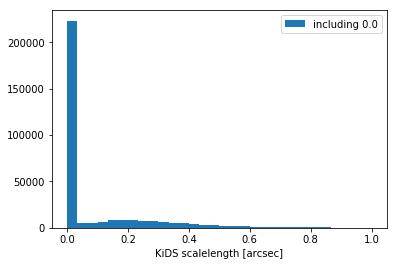

222932
319636
fraction of nulls:  0.697455856036


In [9]:
plt.hist(kd_scalelength,range=(0,1.),bins=30,label='including 0.0')
plt.xlabel('KiDS scalelength [arcsec]')
plt.legend()
plt.show()
print len(kd_scalelength[kd_scalelength==0.0])
print len(kd_scalelength)
print 'fraction of nulls: ',float(len(kd_scalelength[kd_scalelength==0.0]))/float(len(kd_scalelength))

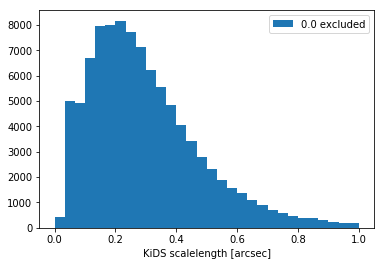

In [10]:
plt.hist(kd_scalelength[kd_scalelength>0.],range=(0,1.),bins=30,label='0.0 excluded')
plt.xlabel('KiDS scalelength [arcsec]')
plt.legend()
plt.show()

In [11]:
csm_r50 = kids['RE_GALFIT_HI']*0.05

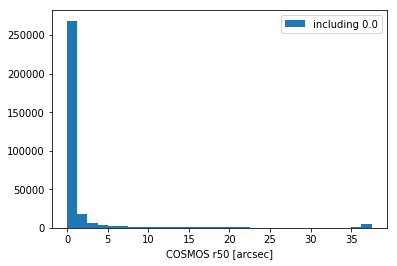

In [12]:
plt.hist(csm_r50,bins=30,label='including 0.0')
plt.xlabel('COSMOS r50 [arcsec]')
plt.legend()
plt.show()

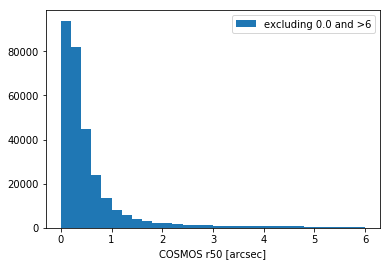

In [13]:
plt.hist(csm_r50[csm_r50>0.0],bins=30,range=(0,6),label='excluding 0.0 and >6')
plt.xlabel('COSMOS r50 [arcsec]')
plt.legend()
plt.show()

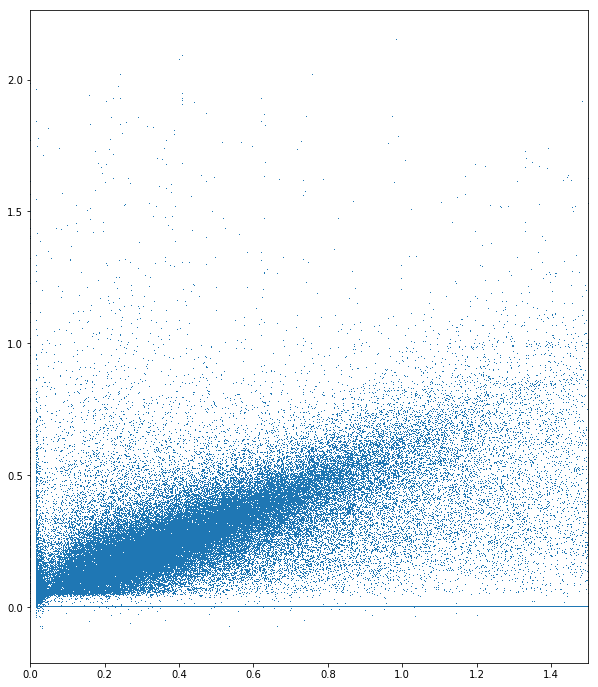

In [14]:
plt.figure(figsize=(10,12))
plt.plot(csm_r50,kd_scalelength,',')
plt.xlim(0.,1.5)
plt.show()

In [15]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    array = np.array(x)
    array = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

In [23]:
sel = np.where((csm_r50>0.)&(kd_scalelength>0.))
meds =median_in_bins_err(csm_r50[sel],kd_scalelength[sel],0.0,1.2,12)

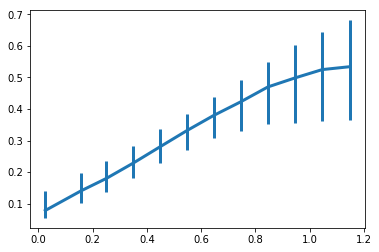

In [30]:
plt.errorbar(meds[0],meds[1],yerr=[meds[2],meds[3]],lw=3)
plt.show()

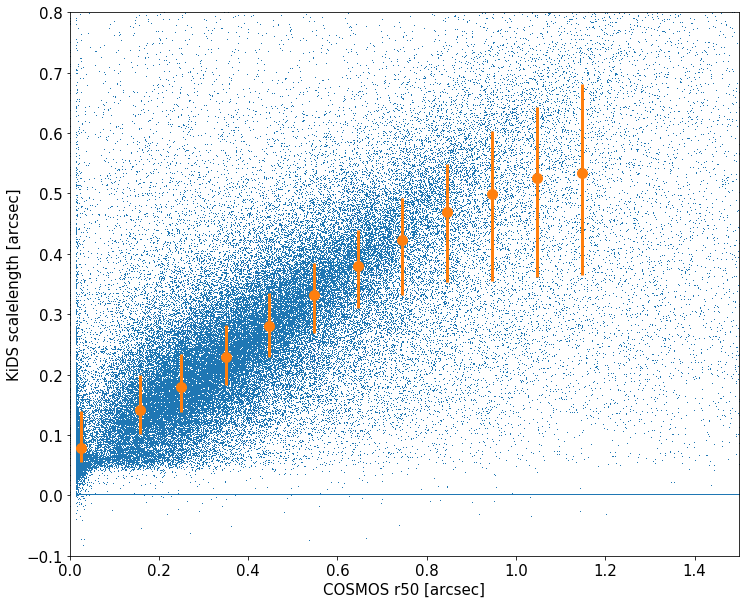

In [72]:
matplotlib.rcParams.update({'font.size': 15})

plt.figure(figsize=(12,10))
plt.plot(csm_r50,kd_scalelength,',',zorder=-1)
plt.errorbar(meds[0],meds[1],yerr=[meds[2],meds[3]],fmt=".",markersize=20,elinewidth=3)
plt.xlim(0.,1.5)
plt.ylim(-0.1,0.8)
plt.xlabel('COSMOS r50 [arcsec]')
plt.ylabel('KiDS scalelength [arcsec]')
plt.savefig('../plots/19/KiDS_COSMOS_comparison.png')
plt.show()

In [36]:
import scipy.optimize as s

In [43]:
def lin(x,a,b):
    return a +b*x
popt,popv = s.curve_fit(lin,meds[0],meds[1])

In [39]:
help(s.curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

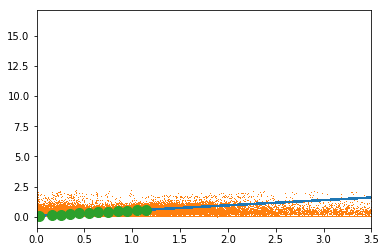

In [66]:
plt.plot(csm_r50,popt[0]+popt[1]*csm_r50)
plt.plot(csm_r50,kd_scalelength,',',zorder=-1)
plt.errorbar(meds[0],meds[1],yerr=[meds[2],meds[3]],fmt=".",markersize=20,elinewidth=3)
plt.xlim(0.,3.5)
#plt.ylim(-5.,5.)

plt.show()

In [50]:
popt[0]

0.081423212996446503

In [51]:
popt[1]

0.43197174492728174